In [300]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df_clean = df
df_clean = df_clean.drop(['Email'], axis=1)
df_clean = df_clean.drop(['Name'], axis=1)
df_clean = df_clean.drop(['Last modified time'], axis=1)
df_clean = df_clean.drop(['Do you consent to us recording this evaluation?'], axis=1)
df_clean.head()


,ID,Start time,Completion time,Age,How concerned are you about digital security?,How experienced are you with Multi-Factor Authentication?,Please select a game you feel you would excel at for Multi-Factor Authentication.,"Chess-Based Authentication\n\nYou will now see a chessboard depicting a specific game situation. Your task is to choose the best possible move to secure a win, moving only one chess piece.","Timing\n\nPlease attempt the authentication process for the 3 difficulty levels 3 times. Each attempt we will record the time it takes for you to complete the task. Each time you complete the task, ...",Difficulty Level 1 (Easy),...,I found the system unnecessarily complex\n,I thought the system was easy to use\n,I think that I would need the support of a technical person to be able to use this system\n,I found the various functions in this system were well integrated\n,I thought there was too much inconsistency in this system\n,I would imagine that most people would learn to use this system very quickly\n,I found the system very cumbersome to use\n,I felt very confident using the system\n,I needed to learn a lot of things before I could get going with this system\n,Any other additional feedback?
0,1,3/6/24 12:43:47,3/6/24 12:56:36,18-24,3,5,Card Counting,NaN,NaN,NaN,...,2,4,1,4,2,4,2,4,2,nah not really
1,2,3/6/24 12:34:27,3/6/24 12:56:49,18-24,3,4,Card Counting,NaN,NaN,NaN,...,4,4,4,4,2,2,3,4,3,I enjoyed the card counting game and wish I wa...
2,3,3/6/24 12:49:42,3/6/24 13:01:13,18-24,4,5,Card Counting,NaN,NaN,NaN,...,1,5,1,5,1,5,1,4,2,Nope
3,4,3/6/24 13:39:03,3/6/24 13:40:11,18-24,5,5,Chess,NaN,NaN,NaN,...,1,5,1,4,2,1,1,3,4,Nope
4,5,3/6/24 13:51:39,3/6/24 13:53:02,18-24,3,4,Anagram,NaN,NaN,NaN,...,3,4,2,4,3,4,3,4,2,"nice design, good job"


In [301]:
def calculate_score_survey(row):
    score = 0
    for i, value in enumerate(row):
        if i in [0,2,4,6,8]:  
            score += value - 1
        elif i in [1,3,5,7,9]:
            score += 5 - value
    score = score * 2.5
    return score

In [302]:
def calculate_score_games(row):
    score = 0
    for value in row:
        score += value - 1
    score *= 2.5
    return score

# Overall 

In [303]:
df_clean['How concerned are you about digital security?'].mean()

3.8

In [304]:
df_clean['How experienced are you with Multi-Factor Authentication?'].mean()

4.5

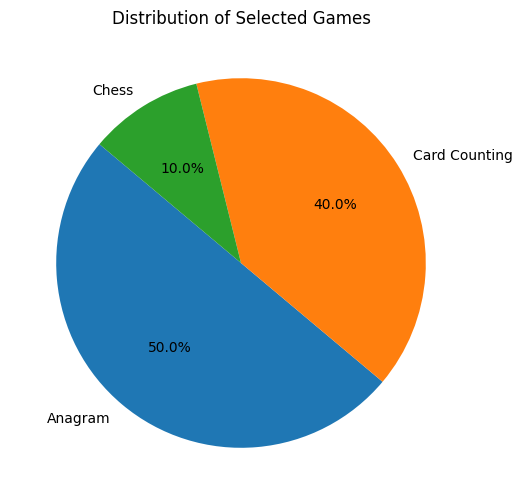

In [305]:
df_game = df_clean['Please select a game you feel you would excel at for Multi-Factor Authentication.'].value_counts()

df_game = df_game.sort_index()

plt.figure(figsize=(8, 6))
plt.pie(df_game, labels=df_game.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Selected Games')

plt.show()

# Chess analysis

In [306]:
df_chess_easy = df_clean.iloc[:,10:13]
df_chess_easy = df_chess_easy.dropna()
df_chess_easy

,Attempt 1 Time:,Attempt 2 Time:,Attempt 3 Time:
3,36332 ms,19593 ms,41128 ms


In [307]:
df_chess_medium = df_clean.iloc[:,14:17]
df_chess_medium = df_chess_medium.dropna()
df_chess_medium

,Attempt 1 Time:2,Attempt 2 Time:2,Attempt 3 Time:2
3,41746 ms,42455 ms,52122 ms


In [308]:
df_chess_hard = df_clean.iloc[:,18:21]
df_chess_hard = df_chess_hard.dropna()
df_chess_hard

,Attempt 1 Time:3,Attempt 2 Time:3,Attempt 3 Time:3
3,DNF,DNF,DNF


In [309]:
df_chess = df_clean.iloc[:,22:28]
df_chess = df_chess.dropna()
df_chess

,Please enter countdown time for Level 1,Did you complete the Level 1 authentication within the given time?,Please enter countdown time for Level 2,Did you complete the Level 2 authentication within the given time?,Please enter countdown time for Level 3,Did you complete the Level 3 authentication within the given time?
3,32351.0,Yes,45441.0,No,DNF,No


In [310]:
df_chess_complete = df_chess.drop(['Please enter countdown time for Level 1'], axis=1)
df_chess_complete = df_chess_complete.drop(['Please enter countdown time for Level 2'], axis=1)
df_chess_complete = df_chess_complete.drop(['Please enter countdown time for Level 3'], axis=1)
df_chess_complete

,Did you complete the Level 1 authentication within the given time?,Did you complete the Level 2 authentication within the given time?,Did you complete the Level 3 authentication within the given time?
3,Yes,No,No


In [311]:
df_chess_SUS = df_clean.iloc[:,28:38]
df_chess_SUS = df_chess_SUS.dropna()
df_chess_SUS

,The process of entering a password was straightforward,The chess-based authentication task was clear and easy to understand,I felt confident making a move in the chess-based authentication task,The authentication process was quick and efficient\n,I believe the chess-based task adds an extra layer of security to the authentication process\n,This method of authentication feels more secure than using a password alone\n,The chess-based authentication method was enjoyable to use\n,I found the chess-based authentication method to be user-friendly\n,I would prefer this method over other multi-factor authentication methods I have used\n,I would feel confident using this authentication method for securing sensitive information or accounts in addition to a password\n
3,5.0,5.0,2.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0


In [312]:
df_chess_SUS['SUS Score'] = df_chess_SUS.apply(calculate_score_games, axis=1)
average_chess_sus_score = df_chess_SUS['SUS Score'].mean()

print("Average SUS Score:", average_chess_sus_score)

Average SUS Score: 90.0


## Qualitative answers

### What did you like most about the chess-based authentication process?

- It will help me improve my chess level while making my account safer at the same time. It's like gamifying security.

### What did you dislike about the chess-based authentication process?

- The colour that was next to move was not very clear.

### Did you encounter any difficulties while performing the authentication tasks? If yes, please describe.

- Using a mouse pad to drag and drop was a bit uncomfortable.

### How do you think the chess-based authentication method could be improved for better security and user experience?

- I would need to get better at chess!

# Anagram analysis

In [313]:
df_anagram_easy = df_clean.iloc[:,45:48]
df_anagram_easy = df_anagram_easy.dropna()
df_anagram_easy

,Attempt 1 Time:4,Attempt 2 Time:4,Attempt 3 Time:4
4,24967,50548,30934
6,32937,19464,DNF
7,19681 ms,9372 ms,16764 ms
8,13351ms,8953ms,9747ms
9,23717,9099,10669


In [314]:
df_anagram_medium = df_clean.iloc[:,49:52]
df_anagram_medium = df_anagram_medium.dropna()
df_anagram_medium

,Attempt 1 Time:5,Attempt 2 Time:5,Attempt 3 Time:5
4,dnf,dnf,dnf
6,DNF,DNF,DNF
7,139187 ms,DNF - ran out of attempts,58579 ms
8,18273ms,35057ms,142041ms
9,61034,87470,25122


In [315]:
df_anagram_hard = df_clean.iloc[:,53:56]
df_anagram_hard = df_anagram_hard.dropna()
df_anagram_hard

,Attempt 1 Time:6,Attempt 2 Time:6,Attempt 3 Time:6
4,dnf,dnf,dnf
6,DNF,DNF,DNF
7,DNF - ran out of attempts,DNF - ran out of attempts,DNF - ran out of attempts
8,312491ms,253018ms,218276ms
9,128063,DNF,DNF


In [316]:
df_anagram = df_clean.iloc[:,57:63]
df_anagram = df_anagram.dropna()
df_anagram

,Please enter countdown time for level 12,Did you complete the Level 1 authentication within the given time?2,Please enter countdown time for level 22,Did you complete the Level 2 authentication within the given time?2,Please enter countdown time for level 32,Did you complete the Level 3 authentication within the given time?2
4,19116.0,Yes,dnf,No,dnf,No
6,16469.0,Yes,DNA,No,DNA,No
7,15272.0,Yes,65922,Yes,dnf,No
8,10683.0,Yes,65123,No,261261,No
9,14495.0,Yes,57875,No,128063,No


In [317]:
df_anagram_complete = df_anagram.drop(['Please enter countdown time for level 12'], axis=1)
df_anagram_complete = df_anagram_complete.drop(['Please enter countdown time for level 22'], axis=1)
df_anagram_complete = df_anagram_complete.drop(['Please enter countdown time for level 32'], axis=1)
df_anagram_complete

,Did you complete the Level 1 authentication within the given time?2,Did you complete the Level 2 authentication within the given time?2,Did you complete the Level 3 authentication within the given time?2
4,Yes,No,No
6,Yes,No,No
7,Yes,Yes,No
8,Yes,No,No
9,Yes,No,No


In [318]:
df_anagram_SUS = df_clean.iloc[:,63:73]
df_anagram_SUS = df_anagram_SUS.dropna()
df_anagram_SUS

,The process of entering a password was straightforward\n,The anagram-based authentication task was clear and easy to understand\n,I felt confident completing the anagram-based authentication task\n,The authentication process was quick and efficient\n2,I believe the anagram-based task adds an extra layer of security to the authentication process\n,This method of authentication feels more secure than using a password alone\n2,The anagram-based authentication method was enjoyable to use\n,I found the anagram-based authentication method to be user-friendly\n,I would prefer this method over other multi-factor authentication methods I have used\n2,I would feel confident using this authentication method for securing sensitive information or accounts in addition to a password\n2
4,4.0,4.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0
6,5.0,5.0,3.0,4.0,5.0,5.0,4.0,5.0,4.0,3.0
7,5.0,5.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0
8,4.0,5.0,3.0,2.0,3.0,4.0,4.0,4.0,2.0,2.0
9,5.0,5.0,5.0,3.0,4.0,4.0,5.0,5.0,4.0,3.0


In [319]:
df_anagram_SUS['SUS Score'] = df_anagram_SUS.apply(calculate_score_games, axis=1)
average_anagram_sus_score = df_anagram_SUS['SUS Score'].mean()

print("Average SUS Score:", average_anagram_sus_score)

Average SUS Score: 67.5


## Qualitative Results

### What did you like most about the anagram-based authentication process?

- the design
- I liked the gamification of it, and it adds security to it since the hacker would have to complete 3 anagrams within the time contraints which even i found hard
- I dont need to get my phone out (i.e. current 2fa)
- The anagrams got quite challenging in the harder mode so I felt quite accomplished when I managed to get them right
- It was very enjoyable to use. I felt myself get better at solving anagrams the more I used it.

### What did you dislike about the anagram-based authentication process?

- the level of hard password
- i could only do the easy ones, but that just shows how secure this method is
- it just doesn't feel secure - anyone could solve anagrams.
- It was quite stressful when it came to the actual test
- The hard difficulty ones felt impossible.

### Did you encounter any difficulties while performing the authentication tasks? If yes, please describe.

- no technical difficulties, but i could only do the easy ones. this could be because it is not individualised towards my needs
- the anagrams were sometimes too hard.
- In easy mode there were a few cases where there were multiple possible words that could be formed from the given letters and so even if the submitted word is a valid word, the guess could still be wrong

### How do you think the anagram-based authentication method could be improved for better security and user experience?

- I think one anagram, especially if it's a harder one would be enough in a real life scenario. Also it would be useful if every time I used this authentication method the system learns what my completion pattern is like
- Maybe only get one correct instead of 3

# Cards analysis

In [320]:
df_cards_easy = df_clean.iloc[:,80:83]
df_cards_easy = df_cards_easy.dropna()
df_cards_easy

,Attempt 1 Time:7,Attempt 2 Time:7,Attempt 3 Time:7
0,19205.0,18413.0,18760.0
1,12745.0,11423.0,9447.0
2,12251.0,8379.0,16396.0
5,8107.0,6098.0,9210.0


In [321]:
df_cards_medium = df_clean.iloc[:,84:87]
df_cards_medium = df_cards_medium.dropna()
df_cards_medium

,Attempt 1 Time:8,Attempt 2 Time:8,Attempt 3 Time:8
0,25423.0,23186.0,24016.0
1,21028.0,17226.0,14087.0
2,17014.0,14206.0,9643.0
5,11390.0,10464.0,11416.0


In [322]:
df_cards_hard = df_clean.iloc[:,88:91]
df_cards_hard = df_cards_hard.dropna()
df_cards_hard

,Attempt 1 Time:9,Attempt 2 Time:9,Attempt 3 Time:9
0,33214.0,21603.0,22496.0
1,18688.0,15913.0,15064.0
2,15262.0,14973.0,11374.0
5,10502.0,13245.0,12088.0


In [323]:
df_cards = df_clean.iloc[:,92:98]
df_cards = df_cards.dropna()
df_cards

,Please enter countdown time for Level 13,Did you complete the Level 1 authentication within the given time?3,Please enter countdown time for Level 23,Did you complete the Level 2 authentication within the given time?3,Please enter countdown time for Level 33,Did you complete the Level 3 authentication within the given time?3
0,18793.0,Yes,24208.0,Yes,25771.0,Yes
1,11205.0,Yes,17447.0,No,16555.0,Yes
2,12342.0,Yes,13621.0,No,13869.0,Yes
5,7805.0,Yes,11090.0,Yes,11945.0,Yes


In [324]:
df_cards_SUS = df_clean.iloc[:,98:108]
df_cards_SUS = df_cards_SUS.dropna()
df_cards_SUS

,The process of entering a password was straightforward\n2,The card counting based authentication task was clear and easy to understand\n,I felt confident completing the card counting based authentication task\n,The authentication process was quick and efficient\n3,I believe the card counting based task adds an extra layer of security to the authentication process\n,This method of authentication feels more secure than using a password alone\n3,The card counting based authentication method was enjoyable to use\n,I found the card counting based authentication method to be user-friendly\n,I would prefer this method over other multi-factor authentication methods I have used\n3,I would feel confident using this authentication method for securing sensitive information or accounts in addition to a password\n3
0,5.0,4.0,5.0,5.0,4.0,5.0,4.0,5.0,2.0,4.0
1,4.0,5.0,4.0,3.0,2.0,4.0,5.0,4.0,1.0,2.0
2,5.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,4.0
5,5.0,5.0,5.0,5.0,3.0,4.0,5.0,5.0,4.0,2.0


In [325]:
df_cards_SUS['SUS Score'] = df_cards_SUS.apply(calculate_score_games, axis=1)
average_cards_sus_score = df_cards_SUS['SUS Score'].mean()

print("Average SUS Score:", average_cards_sus_score)

Average SUS Score: 78.75


## Qualitative answers

### What did you like most about the card counting based authentication process?

- it is easier to do and can pose challenging for inexperienced users
- I liked the overall process of card counting and solving the puzzle
- It's fun to use
- it was a fun game that I enjoyed playing. I felt like the security was based on my skill, with was interesting.

### What did you dislike about the card counting based authentication process?

- sometimes it could be dragging to do
- i  don't like that the authentication does not use anything that I personally know as in everyone could do the card counting authentication if they are fast enough
- The timer made me stressed
- i  am unsure if I would use it to secure sensitive information, but with a password and as a MFA possibly. I would be worried if I was feeling ill and couldn't manage to do it as fast as normally.

### Did you encounter any difficulties while performing the authentication tasks? If yes, please describe.

- During authentication for medium, I miscounted the cards but that was my own issue. Overall, there were no difficulties.

### How do you think the card counting based authentication method could be improved for better security and user experience?

- Maybe if the user gets to choose the rules during creation of the MFA? So that only the user knows the ruleset during authentication
- I think it would be better to provide the user with more personable action, they set their own difficulty, like number of cards instead of set difficulties.

# Box plots

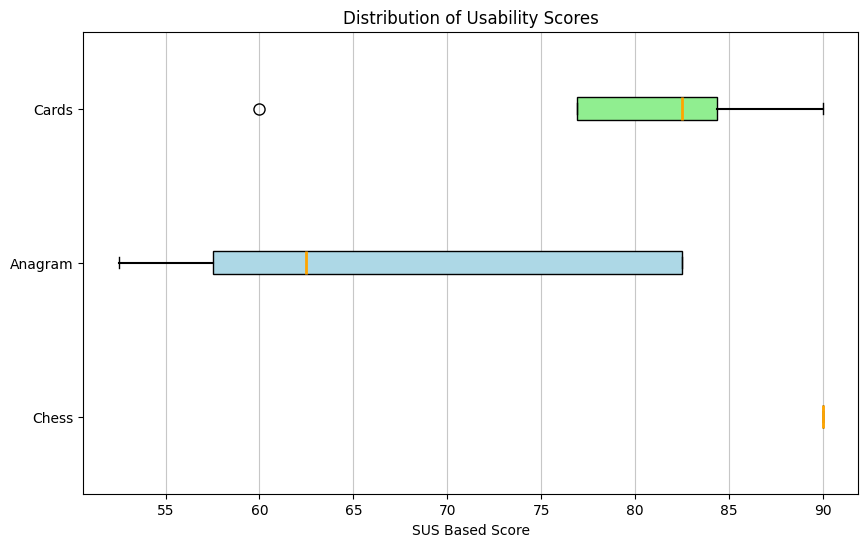

In [326]:
plt.figure(figsize=(10, 6))

plt.boxplot(df_chess_SUS['SUS Score'], positions=[0], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='pink', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

# Second box plot
plt.boxplot(df_anagram_SUS['SUS Score'], positions=[1], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

plt.boxplot(df_cards_SUS['SUS Score'], positions=[2], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightgreen', color='black'),
            whiskerprops=dict(color='black', linewidth=1.5), 
            medianprops=dict(color='orange', linewidth=2),
            capprops=dict(color='black'), 
            flierprops=dict(marker='o', color='red', markersize=8))

# Adjust x-axis labels
plt.yticks([0, 1, 2], ['Chess', 'Anagram', 'Cards'])

# Set labels and title
plt.xlabel('SUS Based Score')
plt.title('Distribution of Usability Scores')
plt.grid(axis='x', linestyle='-', alpha=0.7)

plt.show()

# Usability analysis

In [327]:
df_SUS = df_clean.iloc[:,112:122]
df_SUS

,I think that I would like to use this system frequently\n,I found the system unnecessarily complex\n,I thought the system was easy to use\n,I think that I would need the support of a technical person to be able to use this system\n,I found the various functions in this system were well integrated\n,I thought there was too much inconsistency in this system\n,I would imagine that most people would learn to use this system very quickly\n,I found the system very cumbersome to use\n,I felt very confident using the system\n,I needed to learn a lot of things before I could get going with this system\n
0,3,2,4,1,4,2,4,2,4,2
1,4,4,4,4,4,2,2,3,4,3
2,4,1,5,1,5,1,5,1,4,2
3,5,1,5,1,4,2,1,1,3,4
4,3,3,4,2,4,3,4,3,4,2
5,4,1,5,1,5,1,4,1,4,3
6,4,1,4,1,4,1,3,1,3,2
7,2,3,5,2,4,1,5,1,4,1
8,2,1,4,1,4,1,4,2,4,2
9,5,1,5,1,5,1,5,1,5,1


In [328]:
df_SUS['SUS Score'] = df_SUS.apply(calculate_score_survey, axis=1)
average_sus_score = df_SUS['SUS Score'].mean()

print("Average SUS Score:", average_sus_score)

Average SUS Score: 78.5


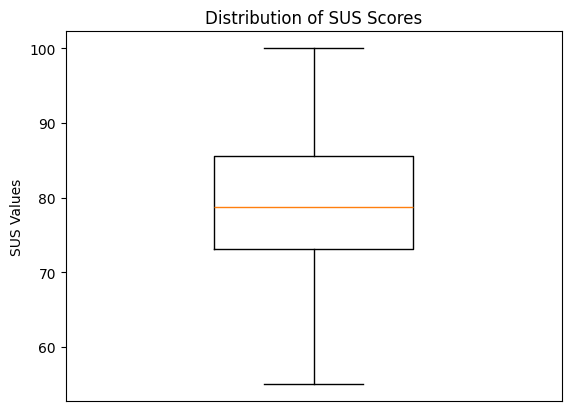

In [329]:
plt.boxplot(df_SUS['SUS Score'], widths=0.4)

plt.xticks([])

plt.xlabel('')
plt.ylabel('SUS Values')
plt.title('Distribution of SUS Scores')

plt.show()


## Qualitative Answers

### Any other additional feedback?

- I enjoyed the card counting game and wish I was better at chess
- nice design, good job
- The system itself is easy to use, but the task itself takes some time to learn.
- i think i would need to learn things because i'm not that good at anagrams or chess, but it does feel secure because of that
- I think the letters for the anagram should be visually more distinct than the rest of the text (either different colour, or different font, or both) and maybe add some space between the characters
